#Paquetes necesarios

In [15]:
import cv2  
import math
import os
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import easyocr

In [2]:
# Entrenar aquí 👍
# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch

# Use the model
results = model.train(data=os.path.join(os.getcwd(), "dataset/data/data.yaml"), epochs=5)  # train the model


                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256,

: 

Desde cámara, detección con yolov8 y modelo nano. Visualización propia

In [17]:
# Carga del modelo
model = YOLO('best.pt') #Contenedores

# Nombre de las distintas clases
classNames = ["license plate"]

debug = True

img = cv2.imread('la_bestia.jpeg')

# Perform inference on an image
results = model(img, stream=True)
box = None
# Para cada detección
for r in results:
    boxes = r.boxes

    if debug:
        for box in boxes:
            # Contenedor
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values
            
            # Confianza
            confidence = math.ceil((box.conf[0]*100))/100
            # print("Confidence --->",confidence)

            # Clase
            clss = int(box.cls[0])
            reader = easyocr.Reader(['es']) 

            #Reconocimiento de una imagen
            result = reader.readtext(img[y1:y1+y2,x1:x1+x2])
            print(result)

            plt.figure()
            plt.axis("off")
            plt.imshow(img[y1:y1+y2,x1:x1+x2])
            plt.title('Contornos')



0: 640x480 1 plate, 165.4ms
Speed: 9.0ms preprocess, 165.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3, 12], [215, 12], [215, 74], [3, 74]], 'GC8499CH', 0.6371275414554178)]


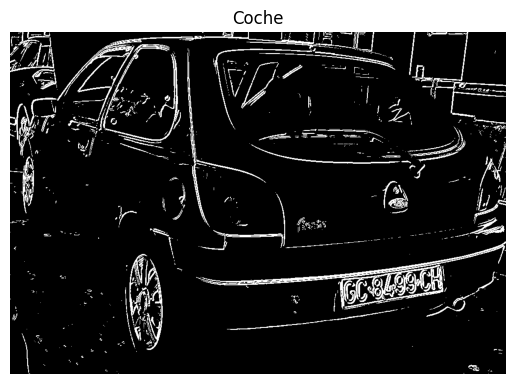

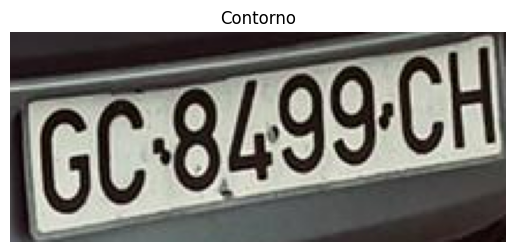

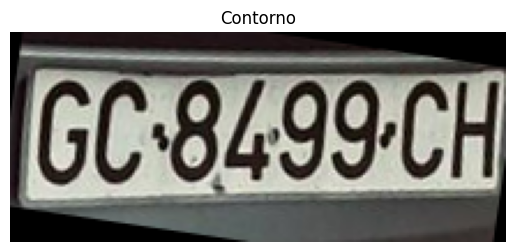

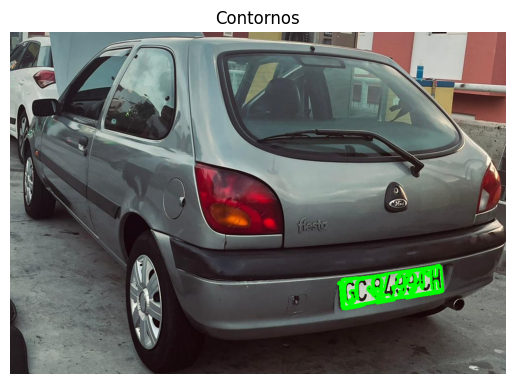

In [16]:
# Carga del modelo
model = YOLO('yolov8n.pt') #Contenedores

# Nombre de las distintas clases
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

debug = False

img = cv2.imread('la_bestia.jpeg')

# Perform inference on an image
results = model(img, stream=True)
box = None
# Para cada detección
for r in results:
    boxes = r.boxes

    for i in boxes: # Asumimos que solo pueda haber un coche
        if i.cls[0] == 2:
            box = i
            break
    if box:
        break

    if debug:
        for box in boxes:
            # Contenedor
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values
            
            # Confianza
            confidence = math.ceil((box.conf[0]*100))/100
            # print("Confidence --->",confidence)

            # Clase
            clss = int(box.cls[0])

            # Convierte identificador numérico de clase a un color RGB
            escala = int((clss / len(classNames)) * 255 * 3)
            if escala >= 255*2:
                R = 255
                G = 255
                B = escala - 255*2
            elif escala >= 255:
                R = 255
                G = escala - 255
                B = 0
            else:
                R = escala
                G = 0
                B = 0

# Clase
clss = int(box.cls[0])
# print("Class name -->", classNames[cls])
x1, y1, x2, y2 = box.xyxy[0]
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

car = img[y1:y2,x1:x2]
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)

car_gris = cv2.cvtColor(car, cv2.COLOR_RGB2GRAY)

ggris = cv2.GaussianBlur(car_gris, (3, 3), 0)
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 120
# Umbralizado con método de Otsu
#ret, img_th2 = cv2.threshold(car_gris, umbral, 255, cv2.THRESH_BINARY)
#ret2,img_th2 = cv2.threshold(car_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
img_th2 = cv2.convertScaleAbs(sobel)
ret, img_th2 = cv2.threshold(img_th2, umbral, 255, cv2.THRESH_BINARY)

plt.figure()
plt.axis("off")
plt.imshow(img_th2, cmap="gray")
plt.title('Coche')

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th2, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)
    area_min = 1000
    area_max = 10000
    #Dimensión mínima (útil en ocasiones)
    if area > area_min and area < area_max:
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)

        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        rect_area= rect[1][1] * rect[1][0]
        
        if rect_area > area*3:
            continue
        
        lp = car[y:y+h,x:x+w]
        plt.figure()
        plt.axis("off")
        plt.imshow(lp)
        plt.title('Contorno')

        M = cv2.getRotationMatrix2D(((w-1)/2.0,(h-1)/2.0),rect[2] - 90,1)
        dst = cv2.warpAffine(lp,M,(w,h))
        plt.figure()
        plt.axis("off")
        plt.imshow(dst)
        plt.title('Contorno')

        print(pytesseract.image_to_string(dst))

        #Dibuja los contornos
        cv2.drawContours(car, [c], -1, (0,255,0), 3)
        pytesseract.image_to_string(lp)

        reader = easyocr.Reader(['es']) 

        #Reconocimiento de una imagen
        result = reader.readtext(dst)
        print(result)


plt.figure()
plt.axis("off")
plt.imshow(car)
plt.title('Contornos')



cv2.waitKey(0)
cv2.destroyAllWindows()